# Visualize Energy Consumption using RECS2020 Data and Validate with AEO2023/AEO2025

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn as the default style
# sns.set_theme()
sns.set_theme(font='sans-serif', style='darkgrid') # Set the font and grid style for Seaborn

# Your color mapping
COLOR_MAP_FUEL = {
    'Electricity': 'seagreen',
    'Natural Gas': 'steelblue', 
    'Propane': 'orange',
    'Fuel Oil': 'gray'
}

# Define the order of end uses for consistent sorting
ENDUSE_ORDER = ['Space Heating', 'Water Heating', 'Air Conditioning', 'Clothes Drying', 'Cooking', 'Other']

# Step 1: Load your data
file_path = r"C:\Users\14128\Desktop\CMU\Dissertation\Post-Defense Submission\Residential_Energy_Consumption_Emissions_RECS_AEO2025.xlsx"

consumption_raw = pd.read_excel(file_path, sheet_name='enduse_cons_summary_RECS')
emissions_raw = pd.read_excel(file_path, sheet_name='enduse_emis_summary_RECS')

print("Original consumption data shape:", consumption_raw.shape)
print("Columns we care about:")
print("- enduse")
print("- enduse_electricity_quads") 
print("- enduse_naturalGas_quads")
print("- enduse_propane_quads")
print("- enduse_fuelOil_quads")

Original consumption data shape: (6, 13)
Columns we care about:
- enduse
- enduse_electricity_quads
- enduse_naturalGas_quads
- enduse_propane_quads
- enduse_fuelOil_quads


In [2]:
consumption_raw

enduse data_source  total_enduse_quads  enduse_electricity_quads  \
0     Space Heating    RECS2020              4.0254                    0.5496   
1     Water Heating    RECS2020              1.7365                    0.5329   
2  Air Conditioning    RECS2020              0.8661                    0.8661   
3    Clothes Drying    RECS2020              0.2310                    0.1906   
4           Cooking    RECS2020              0.1827                    0.0796   
5             Other    RECS2020              2.4393                    2.2342   

   enduse_fuelOil_quads  enduse_naturalGas_quads  enduse_propane_quads  \
0                 0.315                   2.8868                0.2740   
1                 0.053                   1.0812                0.0694   
2                 0.000                   0.0000                0.0000   
3                 0.000                   0.0381                0.0023   
4                 0.000                   0.0915                0.0116   
5                 0.028                   0.1434                0.0337   

   electricity_total_enduse_pp  fuelOil_total_enduse_pp  \
0                    13.653302                 7.825309   
1                    30.688166                 3.052116   
2                   100.000000                 0.000000   
3                    82.510823                 0.000000   
4                    43.568692                 0.000000   
5                    91.591850                 1.147870   

   naturalGas_total_enduse_pp  propane__total_enduse_pp  \
0                   71.714612                  6.806777   
1                   62.263173                  3.996545   
2                    0.000000                  0.000000   
3                   16.493506                  0.995671   
4                   50.082102                  6.349206   
5                    5.878736                  1.381544   

   total_reported_res_cons  percent_total_res_cons  
0                    9.481               42.457547  
1                    9.481               18.315579  
2                    9.481                9.135112  
3                    9.481                2.436452  
4                    9.481                1.927012  
5                    9.481               25.728299

In [3]:
# Step 2: Reshape consumption data from wide to long
consumption_long = pd.melt(
    consumption_raw,
    id_vars=['enduse'],
    value_vars=['enduse_electricity_quads', 'enduse_naturalGas_quads', 
                'enduse_propane_quads', 'enduse_fuelOil_quads'],
    var_name='fuel_column',
    value_name='consumption_quads'
)
consumption_long

enduse               fuel_column  consumption_quads
0      Space Heating  enduse_electricity_quads             0.5496
1      Water Heating  enduse_electricity_quads             0.5329
2   Air Conditioning  enduse_electricity_quads             0.8661
3     Clothes Drying  enduse_electricity_quads             0.1906
4            Cooking  enduse_electricity_quads             0.0796
5              Other  enduse_electricity_quads             2.2342
6      Space Heating   enduse_naturalGas_quads             2.8868
7      Water Heating   enduse_naturalGas_quads             1.0812
8   Air Conditioning   enduse_naturalGas_quads             0.0000
9     Clothes Drying   enduse_naturalGas_quads             0.0381
10           Cooking   enduse_naturalGas_quads             0.0915
11             Other   enduse_naturalGas_quads             0.1434
12     Space Heating      enduse_propane_quads             0.2740
13     Water Heating      enduse_propane_quads             0.0694
14  Air Conditioning      enduse_propane_quads             0.0000
15    Clothes Drying      enduse_propane_quads             0.0023
16           Cooking      enduse_propane_quads             0.0116
17             Other      enduse_propane_quads             0.0337
18     Space Heating      enduse_fuelOil_quads             0.3150
19     Water Heating      enduse_fuelOil_quads             0.0530
20  Air Conditioning      enduse_fuelOil_quads             0.0000
21    Clothes Drying      enduse_fuelOil_quads             0.0000
22           Cooking      enduse_fuelOil_quads             0.0000
23             Other      enduse_fuelOil_quads             0.0280

In [4]:
# Step 3: Clean up the fuel type names
fuel_name_mapping = {
    'enduse_electricity_quads': 'Electricity',
    'enduse_naturalGas_quads': 'Natural Gas',
    'enduse_propane_quads': 'Propane', 
    'enduse_fuelOil_quads': 'Fuel Oil'
}

consumption_long['fuel_type'] = consumption_long['fuel_column'].map(fuel_name_mapping)

# Keep only what we need
consumption_clean = consumption_long[['enduse', 'fuel_type', 'consumption_quads']].copy()

# Show the totals by end use (so you can see the sorting will work)
print("\nTotal consumption by end use (will be sorted greatest to least):")
totals = consumption_clean.groupby('enduse')['consumption_quads'].sum().sort_values(ascending=False)
for enduse, total in totals.items():
    print(f"{enduse}: {total:.2f} quads")

consumption_clean


Total consumption by end use (will be sorted greatest to least):
Space Heating: 4.03 quads
Other: 2.44 quads
Water Heating: 1.74 quads
Air Conditioning: 0.87 quads
Clothes Drying: 0.23 quads
Cooking: 0.18 quads


enduse    fuel_type  consumption_quads
0      Space Heating  Electricity             0.5496
1      Water Heating  Electricity             0.5329
2   Air Conditioning  Electricity             0.8661
3     Clothes Drying  Electricity             0.1906
4            Cooking  Electricity             0.0796
5              Other  Electricity             2.2342
6      Space Heating  Natural Gas             2.8868
7      Water Heating  Natural Gas             1.0812
8   Air Conditioning  Natural Gas             0.0000
9     Clothes Drying  Natural Gas             0.0381
10           Cooking  Natural Gas             0.0915
11             Other  Natural Gas             0.1434
12     Space Heating      Propane             0.2740
13     Water Heating      Propane             0.0694
14  Air Conditioning      Propane             0.0000
15    Clothes Drying      Propane             0.0023
16           Cooking      Propane             0.0116
17             Other      Propane             0.0337
18     Space Heating     Fuel Oil             0.3150
19     Water Heating     Fuel Oil             0.0530
20  Air Conditioning     Fuel Oil             0.0000
21    Clothes Drying     Fuel Oil             0.0000
22           Cooking     Fuel Oil             0.0000
23             Other     Fuel Oil             0.0280

In [5]:
# Step 4: Do the same for emissions
emissions_long = pd.melt(
    emissions_raw,
    id_vars=['enduse'],
    value_vars=['enduse_electricity_MmtCO2', 'enduse_naturalGas_MmtCO2',
                'enduse_propane_MmtCO2', 'enduse_fuelOil_MmtCO2'],
    var_name='fuel_column', 
    value_name='emissions_MmtCO2'
)

emissions_name_mapping = {
    'enduse_electricity_MmtCO2': 'Electricity',
    'enduse_naturalGas_MmtCO2': 'Natural Gas', 
    'enduse_propane_MmtCO2': 'Propane',
    'enduse_fuelOil_MmtCO2': 'Fuel Oil'
}

emissions_long['fuel_type'] = emissions_long['fuel_column'].map(emissions_name_mapping)
emissions_clean = emissions_long[['enduse', 'fuel_type', 'emissions_MmtCO2']].copy()


# Show the totals by end use (so you can see the sorting will work)
print("\nTotal CO2 emissions by end use (will be sorted greatest to least):")
totals = emissions_clean.groupby('enduse')['emissions_MmtCO2'].sum().sort_values(ascending=False)
for enduse, total in totals.items():
    print(f"{enduse}: {total:.2f} MmtCO2")

emissions_clean


Total CO2 emissions by end use (will be sorted greatest to least):
Other: 269.38 MmtCO2
Space Heating: 256.69 MmtCO2
Water Heating: 126.94 MmtCO2
Air Conditioning: 99.86 MmtCO2
Clothes Drying: 24.14 MmtCO2
Cooking: 14.75 MmtCO2


enduse    fuel_type  emissions_MmtCO2
0      Space Heating  Electricity         63.368369
1      Water Heating  Electricity         61.442874
2   Air Conditioning  Electricity         99.860525
3     Clothes Drying  Electricity         21.976003
4            Cooking  Electricity          9.177806
5              Other  Electricity        257.601182
6      Space Heating  Natural Gas        152.740588
7      Water Heating  Natural Gas         57.206292
8   Air Conditioning  Natural Gas          0.000000
9     Clothes Drying  Natural Gas          2.015871
10           Cooking  Natural Gas          4.841265
11             Other  Natural Gas          7.587294
12     Space Heating      Propane         17.230033
13     Water Heating      Propane          4.364103
14  Air Conditioning      Propane          0.000000
15    Clothes Drying      Propane          0.144632
16           Cooking      Propane          0.729447
17             Other      Propane          2.119168
18     Space Heating     Fuel Oil         23.354100
19     Water Heating     Fuel Oil          3.929420
20  Air Conditioning     Fuel Oil          0.000000
21    Clothes Drying     Fuel Oil          0.000000
22           Cooking     Fuel Oil          0.000000
23             Other     Fuel Oil          2.075920

In [6]:
# Step 5: Simple visualization function using seaborn
def make_stacked_bar(data, value_col, title, ylabel):
    """Simple function to make a stacked bar chart with seaborn styling"""
    
    # Set seaborn style
    # sns.set_style("whitegrid")
    
    # Pivot data for stacking
    data_pivot = data.pivot(index='enduse', columns='fuel_type', values=value_col)
    
    # Make sure all fuel types are there in the right order
    fuel_order = ['Electricity', 'Natural Gas', 'Propane', 'Fuel Oil']
    data_pivot = data_pivot.reindex(columns=fuel_order, fill_value=0)
    
    # Use the predefined ENDUSE_ORDER instead of sorting by total
    available_enduses = [enduse for enduse in ENDUSE_ORDER if enduse in data_pivot.index]
    data_pivot = data_pivot.reindex(available_enduses)
    
    # Create the plot with seaborn styling
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create stacked bars using matplotlib but with seaborn colors and style
    colors = [COLOR_MAP_FUEL[fuel] for fuel in fuel_order]
    data_pivot.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8, legend=False)
    
    # Apply seaborn styling
    sns.despine()  # Remove top and right spines
    
    # Make it look nice
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('End Use', fontsize=12)
    # ax.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    
    # Add subtle grid
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    return fig


Creating consumption chart...
Creating emissions chart...


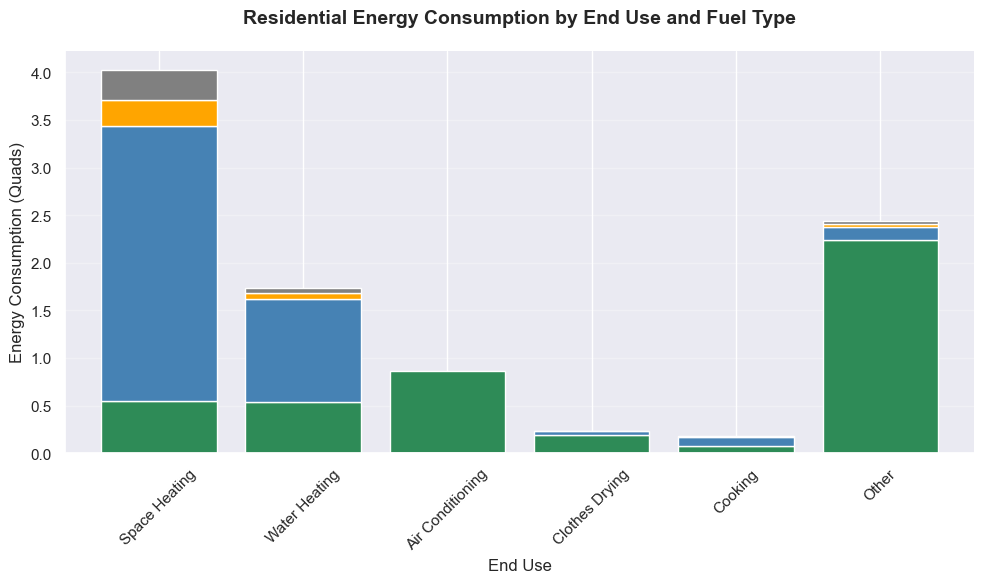

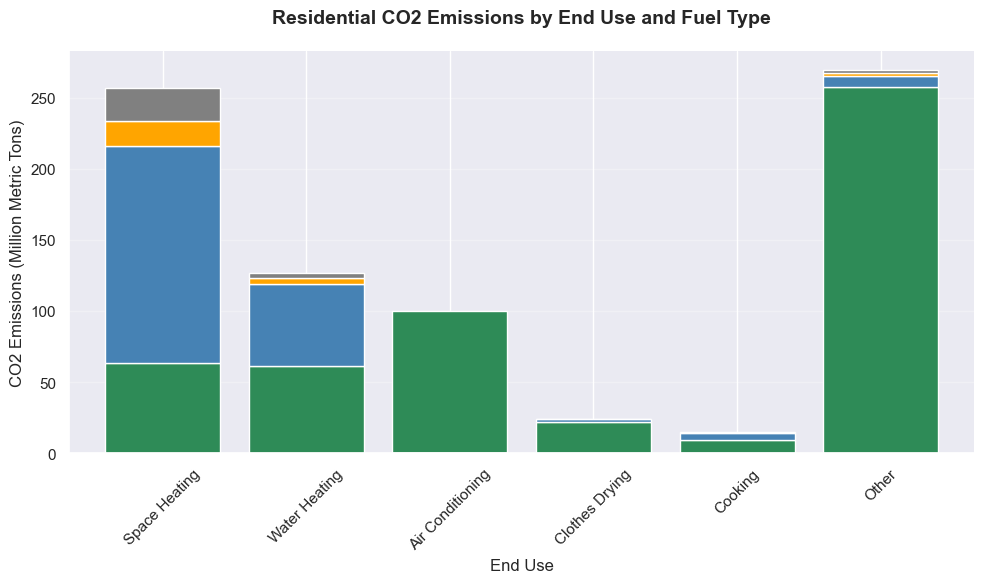


Cleaned data saved to CSV files!


In [ ]:
# Step 6: Create the charts
print("\nCreating consumption chart...")
consumption_fig = make_stacked_bar(
    consumption_clean, 
    'consumption_quads',
    'Residential Energy Consumption by End Use and Fuel Type',
    'Energy Consumption (Quads)'
)

print("Creating emissions chart...")
emissions_fig = make_stacked_bar(
    emissions_clean,
    'emissions_MmtCO2', 
    'Residential CO2 Emissions by End Use and Fuel Type',
    'CO2 Emissions (Million Metric Tons)'
)

# Step 7: Show the plots
plt.show()

# # Optional: Save the cleaned data
# consumption_clean.to_csv('consumption_reshaped.csv', index=False)
# emissions_clean.to_csv('emissions_reshaped.csv', index=False)
# print("\nCleaned data saved to CSV files!")

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, Optional

def create_stacked_bar_subplot(
    consumption_df: pd.DataFrame,
    emissions_df: pd.DataFrame,
    enduse_col: str = 'enduse',
    fuel_col: str = 'fuel_type',
    consumption_value_col: str = 'consumption_quads',
    emissions_value_col: str = 'emissions_MmtCO2',
    color_map: Optional[dict] = None,
    figure_size: Tuple[int, int] = (18, 8),
    consumption_title: str = '65% of Residential Energy Consumption is from Heating (43%),\nWater Heating (18%), Clothes Drying (2%), and Cooking (2%)',
    emissions_title: str = '53% of Residential CO2 Emissions are from Heating (32%),\nWater Heating (16%), Clothes Drying (3%), and Cooking (2%)',
    consumption_ylabel: str = 'Energy Consumption (Quads)',
    emissions_ylabel: str = 'CO2 Emissions (Million Metric Tons)',
    enduse_order: Optional[list] = None
) -> plt.Figure:
    """
    Create side-by-side stacked bar charts for consumption and emissions data.
    
    Args:
        consumption_df: DataFrame with consumption data
        emissions_df: DataFrame with emissions data  
        enduse_col: Column name for end use categories
        fuel_col: Column name for fuel types
        consumption_value_col: Column name for consumption values
        emissions_value_col: Column name for emissions values
        color_map: Dictionary mapping fuel types to colors
        figure_size: Tuple for figure size (width, height)
        consumption_title: Title for consumption subplot
        emissions_title: Title for emissions subplot
        consumption_ylabel: Y-axis label for consumption subplot
        emissions_ylabel: Y-axis label for emissions subplot
        enduse_order: List specifying the order of end uses on x-axis
    
    Returns:
        Matplotlib Figure containing both subplots
    """
    
    # sns.set_style("whitegrid")
    sns.set_style("whitegrid")

    # Default color mapping if none provided
    if color_map is None:
        color_map = {
            'Electricity': 'seagreen',
            'Natural Gas': 'steelblue', 
            'Propane': 'orange',
            'Fuel Oil': 'gray'
        }
    
    # Use the predefined ENDUSE_ORDER if no custom order provided
    if enduse_order is None:
        enduse_order = ENDUSE_ORDER
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figure_size, dpi=600)
    
    # Pivot data for stacked bars
    consumption_pivot = consumption_df.pivot(
        index=enduse_col, 
        columns=fuel_col, 
        values=consumption_value_col
    ).fillna(0)
    
    emissions_pivot = emissions_df.pivot(
        index=enduse_col,
        columns=fuel_col, 
        values=emissions_value_col
    ).fillna(0)
    
    # Ensure consistent column order based on color_map
    fuel_order = [fuel for fuel in color_map.keys() if fuel in consumption_pivot.columns]
    consumption_pivot = consumption_pivot[fuel_order]
    emissions_pivot = emissions_pivot[fuel_order]
    
    # Reorder rows based on the specified enduse_order
    available_enduses = [enduse for enduse in enduse_order if enduse in consumption_pivot.index]
    consumption_pivot = consumption_pivot.reindex(available_enduses)
    emissions_pivot = emissions_pivot.reindex(available_enduses)
    
    # Create colors list in same order
    colors = [color_map[fuel] for fuel in fuel_order]
    
    # Plot consumption (left subplot)
    consumption_pivot.plot(
        kind='bar',
        stacked=True,
        ax=ax1,
        color=colors,
        width=0.7
    )
    ax1.set_title(consumption_title, fontsize=22, fontweight='bold', pad=15)
    ax1.set_ylabel(consumption_ylabel, fontsize=20, fontweight='bold')
    ax1.set_xlabel('')

    # Plot emissions (right subplot)  
    emissions_pivot.plot(
        kind='bar',
        stacked=True,
        ax=ax2,
        color=colors,
        width=0.7
    )
    ax2.set_title(emissions_title, fontsize=22, fontweight='bold', pad=15)
    ax2.set_ylabel(emissions_ylabel, fontsize=20, fontweight='bold')
    ax2.set_xlabel('')

    for ax in [ax1, ax2]:
        # Remove legend as requested
        if ax.get_legend():
            ax.get_legend().remove()
            
        # Rotate x-axis labels and set font size for better readability
        ax.tick_params(axis='x', rotation=45, labelsize=20)
        ax.tick_params(axis='y', labelsize=20)
        
        ax.grid()

        # Clean up appearance
        sns.despine(ax=ax)
    
    # Add a shared legend at the bottom center of the figure
    # Get the handles and labels from one of the subplots (they're the same for both)
    handles, labels = ax1.get_legend_handles_labels()

    # Create a figure-level legend at the bottom center
    fig.legend(handles, labels, 
              loc='lower center', 
              bbox_to_anchor=(0.5, -0.05),  # Position it below the plots
              ncol=len(labels),  # Display all items in one row
              fontsize=20,
              frameon=True,
              fancybox=True
              )

    # Adjust layout to make room for the legend
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.24)  # Make room for the legend at the bottom

    return fig

In [26]:
# Test the visualization with the corrected ENDUSE_ORDER
fig = create_stacked_bar_subplot(
    consumption_df=consumption_clean,
    emissions_df=emissions_clean,
    color_map=COLOR_MAP_FUEL,
    consumption_title= '2020 Residential Energy Consumption, by End-Use and Fuel',
    emissions_title='2020 Residential CO2 Emissions, by End-Use and Fuel',
    enduse_order=ENDUSE_ORDER  # This should now include all end uses including Cooking
)

plt.show()

In [10]:
# Test the visualization with the corrected ENDUSE_ORDER
fig = create_stacked_bar_subplot(
    consumption_df=consumption_clean,
    emissions_df=emissions_clean,
    color_map=COLOR_MAP_FUEL,
    consumption_title= '2020 Residential Energy Consumption,\nby enduse and Fuel Type',
    emissions_title='2020 Residential CO2 Emissions,\nby enduse and Fuel Type',
    enduse_order=ENDUSE_ORDER  # This should now include all end uses including Cooking
)

plt.show()

In [11]:
# Test the function with existing data
fig = create_stacked_bar_subplot(
    consumption_clean,
        emissions_clean,
        color_map=COLOR_MAP_FUEL,
        enduse_order=ENDUSE_ORDER
    )

# Modify x-tick labels to use line breaks for better spacing
for ax in fig.get_axes():
    labels = ax.get_xticklabels()
    new_labels = []
    for label in labels:
        text = label.get_text()
        
        # # Add line breaks for common multi-word labels
        # text = text.replace('Space Heating', '\nHeating')
        # text = text.replace('Conditioning', '\nConditioning') 
        # text = text.replace('Drying', '\nDrying')
        text = text.replace('All Other End-Uses', 'All Other\nEnd-Uses')
        new_labels.append(text)
    ax.set_xticklabels(new_labels)

plt.show()
